In [ ]:
# ! pip install tensorly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob
from tensorly.decomposition import parafac, tucker
from tensorly import tucker_to_tensor

from mpl_toolkits.mplot3d import axes3d
from tensorly.tenalg import mode_dot, multi_mode_dot

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# read the dataset

## biosignals

In [2]:
dict_df_bios = dict()
bio_types = ['TEMP', 'HR', 'EDA', 'BVP', 'response']

for t in bio_types:    
    dict_df_bios[t] = pd.DataFrame()
dict_df_bios

{'TEMP': Empty DataFrame
 Columns: []
 Index: [],
 'HR': Empty DataFrame
 Columns: []
 Index: [],
 'EDA': Empty DataFrame
 Columns: []
 Index: [],
 'BVP': Empty DataFrame
 Columns: []
 Index: [],
 'response': Empty DataFrame
 Columns: []
 Index: []}

In [3]:
### read in all dataframes in the folder, and merge the same biosignals 
paths = glob.glob('./dataset/**/*.csv',recursive=True)

In [4]:
# paths
# for item in paths:
#     if item[-3:]=='csv':      
#         l = item.split("/")
#         if len(l)==7:
#             print(l[2:7])
#         else:
#             print(l[2:8])

In [5]:
### for windows

for item in paths:  
    temp_df = pd.read_csv(item) 
    
    term_list = item.split("\\")
#         print(len(term_list))
    if len(term_list)==6:
        temp_df['cohort'] = term_list[1]
        temp_df['ID'] = int(term_list[2][-1])
        temp_df['round'] = int(term_list[3][-1])
        temp_df['phase'] = int(term_list[4][-1])

        bio = term_list[-1].split('.')[0]        
        dict_df_bios[bio] = dict_df_bios[bio].append(temp_df, ignore_index=True)

    else:
        temp_df['cohort'] = term_list[2]
        temp_df['ID'] = int(term_list[3][-1])
        temp_df['round'] = int(term_list[4][-1])
        temp_df['phase'] = int(term_list[5][-1])

        bio = term_list[-1].split('.')[0]        
        dict_df_bios[bio] = dict_df_bios[bio].append(temp_df, ignore_index=True)



In [6]:
# # ### for macOS

# for item in paths:
# #     if item[-3:]=='csv':        
#     temp_df = pd.read_csv(item) 

#     term_list = item.split("/")
# #         print(len(term_list))
#     if len(term_list)==7:
#         temp_df['cohort'] = term_list[2]
#         temp_df['ID'] = int(term_list[3][-1])
#         temp_df['round'] = int(term_list[4][-1])
#         temp_df['phase'] = int(term_list[5][-1])

#         bio = term_list[-1].split('.')[0]        
#         dict_df_bios[bio] = dict_df_bios[bio].append(temp_df, ignore_index=True)

#     else:
#         temp_df['cohort'] = term_list[3]
#         temp_df['ID'] = int(term_list[4][-1])
#         temp_df['round'] = int(term_list[5][-1])
#         temp_df['phase'] = int(term_list[6][-1])

#         bio = term_list[-1].split('.')[0]        
#         dict_df_bios[bio] = dict_df_bios[bio].append(temp_df, ignore_index=True)


In [7]:
df_temp = dict_df_bios['TEMP'].drop(columns=['Unnamed: 0'])
df_hr = dict_df_bios['HR'].drop(columns=['Unnamed: 0'])
df_eda = dict_df_bios['EDA'].drop(columns=['Unnamed: 0'])
df_bvp = dict_df_bios['BVP'].drop(columns=['Unnamed: 0'])
df_response = dict_df_bios['response'].drop(columns=['Unnamed: 0'])

In [8]:
# df_response

## team_info

In [9]:
## for windows

paths_w_info = glob.glob('./dataset 2/**/team_info.csv',recursive=True)

df_team = pd.DataFrame() 

for item in paths_w_info:
    term_list = item.split("\\")

    temp_df = pd.read_csv(item) 

    if len(term_list)==3:
        temp_df['cohort'] = term_list[1]

    else:
        temp_df['cohort'] = term_list[2]

    df_team = df_team.append(temp_df, ignore_index = True)

In [10]:
# ### for macOS
# paths_w_info = glob.glob('./dataset 2/**/team_info.csv',recursive=True)

# df_team = pd.DataFrame() 

# for item in paths_w_info:
#     term_list = item.split("/")

#     temp_df = pd.read_csv(item) 

#     if len(term_list)==4:
#         temp_df['cohort'] = term_list[2]

#     else:
#         temp_df['cohort'] = term_list[3]

#     df_team = df_team.append(temp_df, ignore_index = True)


In [11]:
df_team['ID']= [int(i[-1]) for i in df_team['ID'].values]
df_team.drop(columns=['Unnamed: 0'],inplace = True)

In [12]:
df_team

,ID,Team,Puzzler,cohort
0,1,2.0,1.0,D1_1
1,2,2.0,0.0,D1_1
2,3,1.0,0.0,D1_1
3,4,3.0,1.0,D1_1
4,5,3.0,0.0,D1_1
5,6,4.0,0.0,D1_1
6,7,4.0,1.0,D1_1
7,8,1.0,1.0,D1_1
8,1,1.0,0.0,D1_2
9,2,2.0,0.0,D1_2


## response on emotions

In [13]:
neg_emotions=['upset','hostile','ashamed','nervous','afraid','frustrated']
pos_emotions=['alert','inspired','determined','attentive','active']


emotions = neg_emotions+pos_emotions

In [14]:
print(len(emotions), len(neg_emotions), len(pos_emotions))

11 6 5


In [15]:
dict_df_bios['response']  =dict_df_bios['response'][emotions+ ['cohort', 'ID', 'round','phase']]

dict_df_bios['response']

,upset,hostile,ashamed,nervous,afraid,frustrated,alert,inspired,determined,attentive,active,cohort,ID,round,phase
0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0,D1_1,1,1,1
1,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,2.0,3.0,D1_1,1,1,2
2,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,D1_1,1,1,3
3,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,3.0,2.0,1.0,D1_1,1,2,1
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,D1_1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,D1_3_4,2,3,2
308,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,D1_3_4,2,3,3
309,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,D1_3_4,2,4,1
310,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,D1_3_4,2,4,2


In [16]:
df_emo = dict_df_bios['response'][emotions]
df_emo

,upset,hostile,ashamed,nervous,afraid,frustrated,alert,inspired,determined,attentive,active
0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0
1,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,2.0,3.0
2,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0
3,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,3.0,2.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
307,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0
308,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
309,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0
310,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


In [17]:
scaler = StandardScaler()
df_emo = scaler.fit_transform(df_emo)

In [18]:
df_emo = pd.DataFrame(df_emo)
df_emo.fillna(0, inplace=True)

In [19]:
emo_components = range(2,10)

for e in emo_components:    
    pca = PCA(n_components = e)
    pca.fit(df_emo)
#     print(pca.explained_variance_ratio_.sum())
    
    if pca.explained_variance_ratio_.sum()>0.7:
        emotional_component = e
        break
        
print(emotional_component)    

pca = PCA(n_components = emotional_component)
df_emo = pca.fit_transform(df_emo)

4


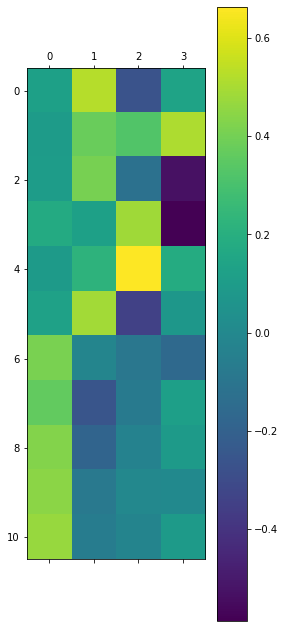

In [20]:
plt.matshow(pca.components_.T)
plt.colorbar()

In [21]:
df_emo = pd.concat((pd.DataFrame(df_emo, columns=['emo1','emo2','emo3','emo4']), 
           dict_df_bios['response'][['cohort','ID','round','phase']]),axis=1)

## downsampling and merge

In [22]:
cohorts = df_temp.cohort.unique()
id_in_cohorts = dict()
for c in cohorts:
    id_in_cohorts[c] = df_temp[df_temp['cohort']==c].ID.unique()

In [23]:
id_in_cohorts

{'D1_1': array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 'D1_2': array([1, 2, 3, 4, 5, 6], dtype=int64),
 'D1_3_1': array([1, 2, 3, 4], dtype=int64),
 'D1_3_2': array([1, 2, 3, 4], dtype=int64),
 'D1_3_3': array([1, 2], dtype=int64),
 'D1_3_4': array([1, 2], dtype=int64)}

In [24]:
# downsample each biosignal df to frequencey 1s

bio_types = ['TEMP', 'HR', 'EDA', 'BVP', 'response']
dfs = [df_temp, df_hr, df_eda, df_bvp]
dfs_downsampled = []

for df in dfs:
    tmp = pd.DataFrame()

    for c in cohorts:
        df_c = df[df['cohort']==c]
        
        for i in id_in_cohorts[c]:
            df_person = df_c[df_c['ID']==i]
            df_person['time'] = pd.to_datetime(df_person['time'])

            df_person.set_index('time', inplace=True)
            df_person = df_person.asfreq('1s')
            
            tmp = tmp.append(df_person)
            
    dfs_downsampled.append(tmp)
  

<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person['time'] = pd.to_datetime(df_person['time'])
<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person['time'] = pd.to_datetime(df_person['time'])
<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person['time'] = pd.to_datetime(df_person['time'])
<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person['time'] = pd.to_datetime(df_person['time'])
<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person['time'] = pd.to_datetime(df_person['time'])
<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person['time'] = pd.to_datetime(df_person['time'])
<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person['time'] = pd.to_datetime(df_person['time'])
<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person['time'] = pd.to_datetime(df_person['time'])
<ipython-input-24-55685294b325>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [25]:
# align all datapoints (to the same nearest timegrid point) and merge all biosignals to one df
dfs_bios_by_person = []

for c in cohorts:
    for i in id_in_cohorts[c]: 
#         print('\n')
        for j,df in enumerate(dfs_downsampled):
            df_right = df[(df['cohort']==c) & (df['ID']==i)] 
            
#             print(df_right.groupby(['round','phase']).count().iloc[:,0].values)
            
            if j==0:
                tmp = df_right.sort_index().reset_index()               
            else:
                tmp = pd.merge_asof(tmp, df_right.sort_index().reset_index().iloc[:,:2], on="time", direction='nearest')

        dfs_bios_by_person.append(tmp)
        
N_ppl = len(dfs_bios_by_person)    

print([len(item) for item in dfs_bios_by_person])   
print(sum([len(item) for item in dfs_bios_by_person]), 
      int(np.mean(([len(item) for item in dfs_bios_by_person]))))

[4042, 3777, 4029, 3824, 3962, 3890, 3929, 4058, 3727, 3655, 3652, 3653, 3730, 3636, 3570, 3567, 3573, 3565, 3649, 3649, 3654, 3648, 3551, 3550, 3732, 3729]
97001 3730


In [26]:
# k=0
# for c in cohorts:
#     for i in id_in_cohorts[c]:
#         print('\n')
#         for j,df in enumerate(dfs):
#             print(dfs_bios_by_person[k].time.max() - dfs_bios_by_person[k].time.min())
#             df_right = df[(df['cohort']==c) & (df['ID']==i)] 
#             print(bio_types[j], str(pd.to_datetime(df_right.time).max() - pd.to_datetime(df_right.time).min()))
#         k+=1
        

In [27]:
# df_eda_w_team = df_eda.merge(df_team, on=['cohort','ID'])
# df_eda_w_team

# check the basics

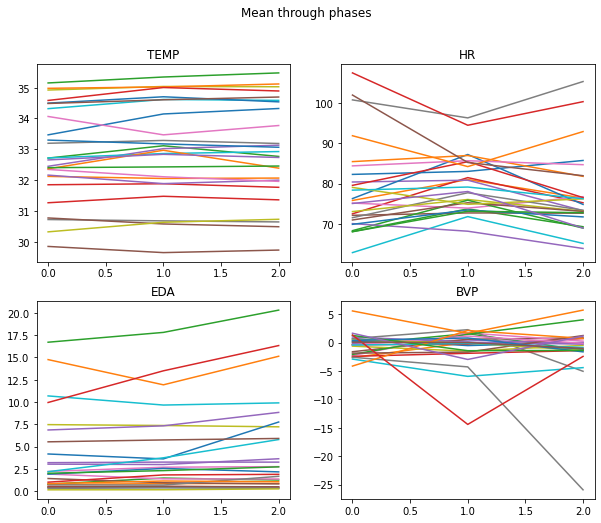

In [28]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Mean through phases')

for i,b in enumerate(bio_types[:-1]):
    ax = fig.add_subplot(2,2,i+1)
    
    for df in dfs_bios_by_person:
        phase_mean = df.groupby(['phase']).mean()      
        ax.plot(range(3), phase_mean[b])
        ax.set_title(b)


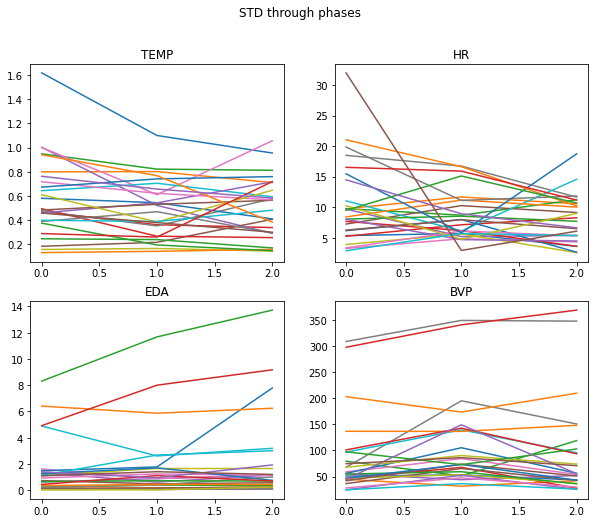

In [29]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('STD through phases')
for i,b in enumerate(bio_types[:-1]):
    ax = fig.add_subplot(2,2,i+1)
    
    for df in dfs_bios_by_person:
        phase_std = df.groupby(['phase']).std()      
        ax.plot(range(3), phase_std[b])
        ax.set_title(b)

In [30]:
# fig = plt.figure(figsize=(20,10))


# df_temp_c = df_temp[df_temp['cohort']=='D1_1']

# for i in range(6):
#     fig.add_subplot(2,3,i+1)
#     temp = df_temp_c[df_temp_c['ID']==i
        

# decompose

In [31]:
### concatenate all df to np.array: [26 samples(participants)* 3550 timepoints * 4 features]

n_timepoints = int(np.min([len(item) for item in dfs_bios_by_person]))
x = np.zeros((N_ppl, n_timepoints, 4))

for i,df in enumerate(dfs_bios_by_person):
    rng = pd.date_range(df.time.min(), df.time.max(), periods=n_timepoints)
    x[i,:] = df.set_index('time').reindex(rng, method='nearest')[bio_types[:-1]].to_numpy()
    
x.shape

(26, 3550, 4)

In [32]:
round_time = []
phase_time = []
for df in dfs_bios_by_person:
    round_time.append(
        (df.groupby('round').max().time - df.groupby('round').min().time).to_numpy()
    )
    phase_time.append(
        (df.groupby(['round','phase']).max().time - df.groupby(['round','phase']).min().time).to_numpy()
    )
    
round_time = np.array(round_time).reshape(26,-1)
phase_time = np.array(phase_time).reshape(26,-1)

In [33]:
experiment_time = [(df.time.max() - df.time.min()).to_numpy() for df in dfs_bios_by_person]
phase_percentage=[]

for p in range(26):
    phase_percentage.append(phase_time[p]/experiment_time[p])

In [35]:
phase_percentage = np.array(phase_percentage).reshape(26,-1)
mean_phase_percentage = phase_percentage.mean(axis=0)
accu_phase_percentage = [np.sum(mean_phase_percentage[:i+1]) for i in range(len(mean_phase_percentage))]

In [36]:
accu_phase_percentage

[0.06426926985822548,
 0.13000109973791787,
 0.19169825393914786,
 0.25111797922660833,
 0.3137147180637811,
 0.3744723652407129,
 0.4309972745436341,
 0.49266600942811356,
 0.5524063968024655,
 0.6114774518446967,
 0.6730770743108059,
 0.731183009157667]

## parafac (*not informative enough)

In [37]:
# !pip install tensorly

In [38]:
# df.set_index('time').reindex(rng, method='nearest')[bio_types[:-1]].to_numpy()

In [39]:
# result = parafac(x, 1)

# # Extract loadings for sample (a), temporal (b) and spectral (c) mode
# a = result[1][0]
# b = result[1][1]
# c = result[1][2]


# # Plot model loadings for first PARAFAC component
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,4), dpi=600)
# ax[0].scatter(range(len(c.flatten())), c.ravel())
# ax[1].scatter(range(len(b.flatten())), b.ravel())
# ax[2].scatter(range(len(a.flatten())), a.ravel())
# ax[0].set_title('Spectral mode loading\n(Comp1)')
# ax[1].set_title('Temporal mode loading\n(Comp1)')
# ax[0].set_xlabel('$\\lambda$ in $cm^{-1}$')
# ax[1].set_xlabel('time in $min$')
# ax[2].set_xlabel('$c_{casein}$ in $\\frac{g}{L}$')
# ax[2].set_title('Sample mode loading (scores)\n(Comp1)')
# plt.tight_layout()

## tucker3

### test the parameters

In [40]:
people_components = [1,2,13,26]
time_components = [1,2,3,4]
feature_conponents = [1,2,3,4]

In [41]:
print('people','\t','time','\t','feature','\t','MAE','\t\t','MSE')

for p in people_components:
    for t in time_components:
        for f in feature_conponents:
            core, factors = tucker(x, rank=[p, t, f])

            x_reconstruct = tucker_to_tensor((core, factors))
            res = x-x_reconstruct

            e_mae = np.sum(np.abs(res))/N_ppl
            e_mse = np.sum(res**2)/N_ppl
            print(p,'\t',t,'\t',f,'\t',e_mae,'\t',e_mse)
        print('\n')


people 	 time 	 feature 	 MAE 		 MSE
1 	 1 	 1 	 629677.302849806 	 70972408.46980992
1 	 1 	 2 	 289606.21692676545 	 60458127.25997845
1 	 1 	 3 	 289606.20881915395 	 60458127.259791024
1 	 1 	 4 	 289602.3553864184 	 60458127.215133294


1 	 2 	 1 	 628937.2831173285 	 70957502.52908851
1 	 2 	 2 	 348779.0117416874 	 56431708.2205457
1 	 2 	 3 	 348779.77128456836 	 56431707.73950371
1 	 2 	 4 	 348787.41613895446 	 56431704.40857066


1 	 3 	 1 	 629335.2180100009 	 70957441.5653954
1 	 3 	 2 	 350087.4442385475 	 56429763.99510132
1 	 3 	 3 	 349995.43604484317 	 56424756.733442105
1 	 3 	 4 	 349924.00999884703 	 56423882.91150523


1 	 4 	 1 	 629335.6901791679 	 70957447.60713978
1 	 4 	 2 	 349823.03180755855 	 56429617.25886582
1 	 4 	 3 	 349736.1997527215 	 56424664.47366255
1 	 4 	 4 	 349669.36171369045 	 56419826.401427016


2 	 1 	 1 	 629677.0809204212 	 70972295.10201463
2 	 1 	 2 	 316877.2557308343 	 59670653.84899415
2 	 1 	 3 	 316876.1510275953 	 59670653.60887

In [127]:
core, factors = tucker(x, rank=[2, 4, 3])
x_reconstruct = tucker_to_tensor((core, factors))
res = x-x_reconstruct

print(core[0])
print('\n')
print(core[1])
print('\n')
print([f.shape for f in factors])

[[ 2.40389041e+04  6.70624507e+03  1.49839169e+01]
 [-5.07700786e+03 -5.19736069e+02  1.06539947e+01]
 [-3.07512322e+03  1.15089053e+04  9.27240013e-01]
 [-7.84618072e+00 -4.99074846e+00 -8.04322265e+01]]


[[-2.38034569e+03  6.08231265e+03  8.58565390e+00]
 [-6.27884991e+03  1.81814417e+04 -2.64725155e+00]
 [ 1.33017511e+02 -4.83768816e+02  1.07178338e+01]
 [-8.35051328e+02 -2.90612933e+02  3.61051775e+02]]


[(26, 2), (3550, 4), (4, 3)]


In [70]:
# fig = plt.figure(figsize=(16,20))
# k=0

# for p in range(26):
#     ax = fig.add_subplot(6,5, k+1)
#     for d in range(2):
#         ax.scatter(range(355), x_reconstruct[p,:,d], s=1)
        
#     k+=1

###  a. Do bio components discriminate puzzler/instructor?

- Yes, and the effective dimensionality of biosignals is 3, despite of colinearity between 2 converted basis. 
Setting the dimensionality of biosignals to 2 also suggests different clusterings of the two roles, but the large overlapping area does not to be satisfying a result.

- residuls against reconstruct

In [142]:
x_phase2 = np.zeros((N_ppl, n_timepoints, 4))

for i,df in enumerate(dfs_bios_by_person):
    df = df[df.phase==2]
    rng = pd.date_range(df.time.min(), df.time.max(), periods=n_timepoints)
    x_phase2[i,:] = df.set_index('time').reindex(rng, method='nearest')[bio_types[:-1]].to_numpy()
    
print(x_phase2.shape)

core2, factors2 = tucker(x_phase2, rank=[2, 4, 3])
x_reconstruct2 = tucker_to_tensor((core2, factors2))
res2 = x_phase2-x_reconstruct2


(26, 3550, 4)


In [143]:
puzzler_ind = []

k=0
for c in cohorts:
    for i in id_in_cohorts[c]:
        if (df_team[(df_team['cohort']==c)&(df_team['ID']==i)].Puzzler.values[0]==1):
            puzzler_ind.append(k)
        k+=1
        
puzzler_ind

[0, 3, 6, 7, 11, 12, 13, 14, 15, 18, 21, 23, 25]

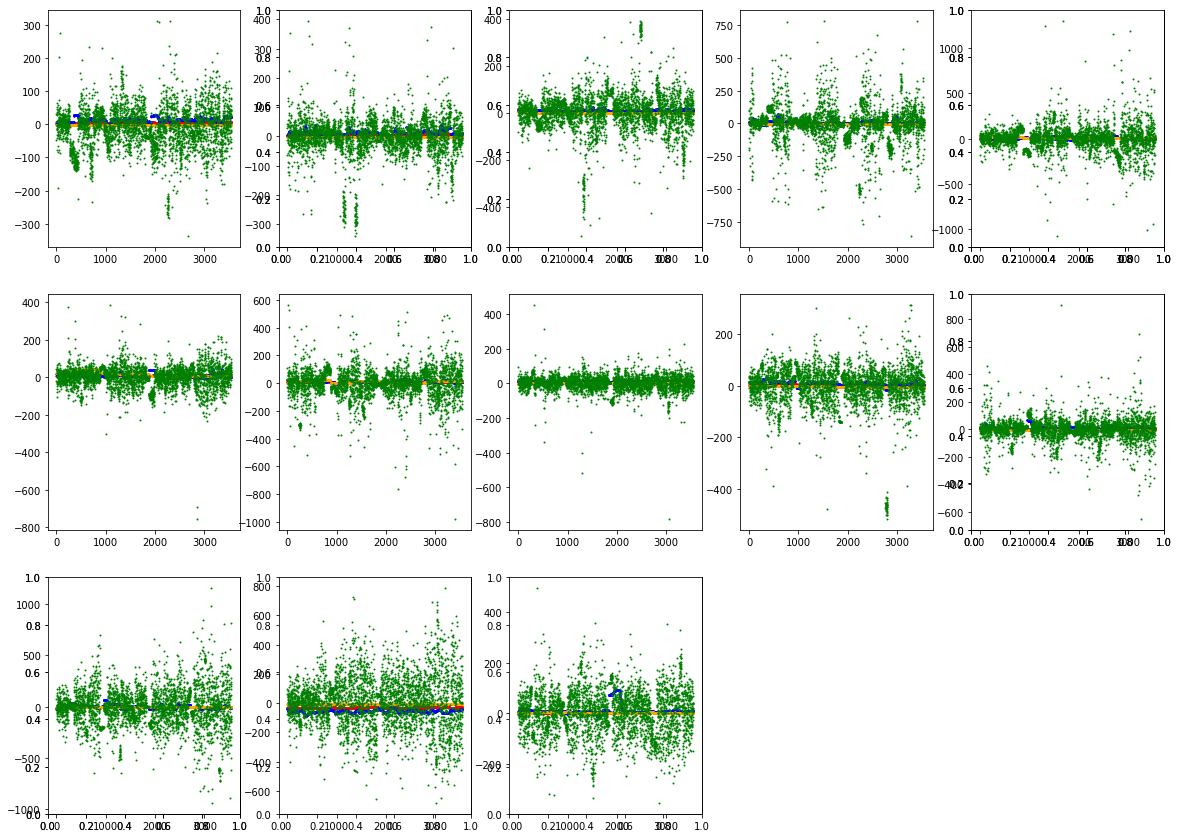

In [144]:
colors=['red','blue','orange','green']

fig = plt.figure(figsize=(20,20))
k=0

for p in range(26):
    ax = fig.add_subplot(4,5, k+1)
    if p in puzzler_ind:
        for d in range(4):
            ax.scatter(range(n_timepoints), res[p,:,d], s=1, c=colors[d])
        k+=1
            

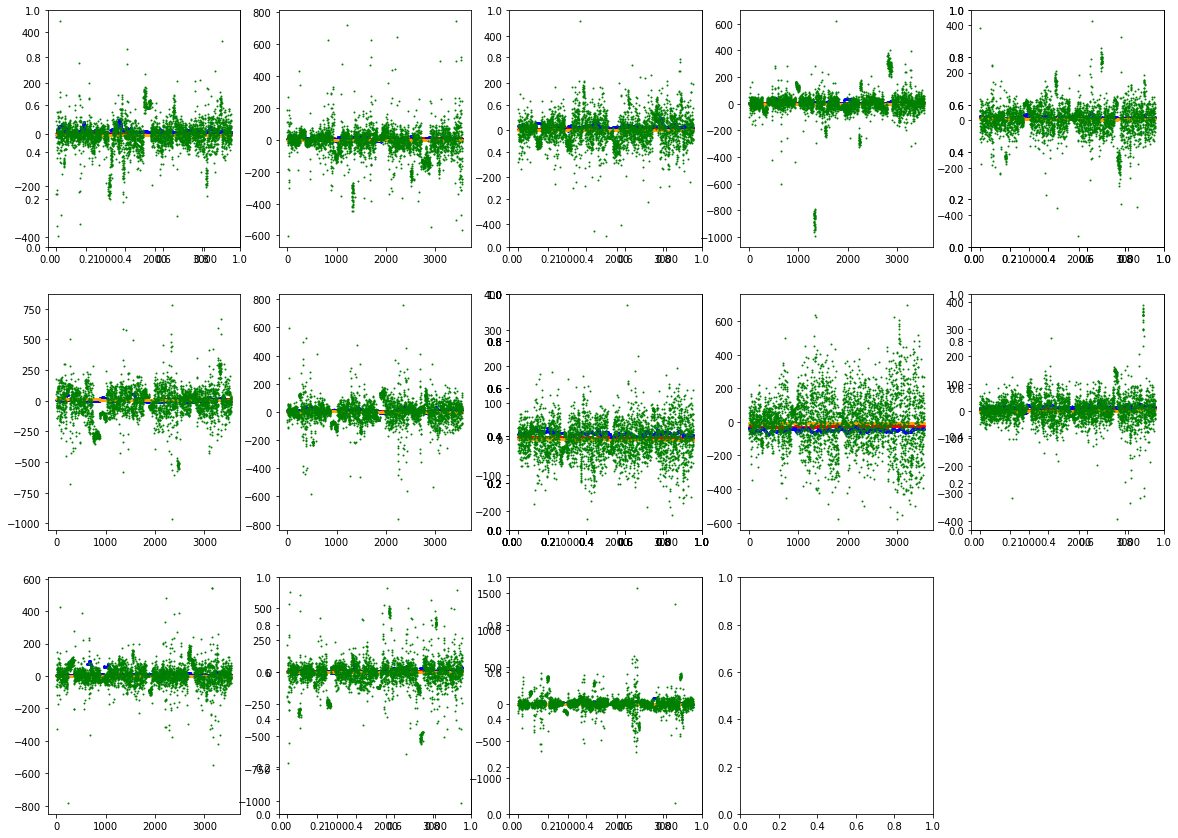

In [145]:
fig = plt.figure(figsize=(20,20))
k=0

for p in range(26):
    ax = fig.add_subplot(4,5, k+1)
    if p not in puzzler_ind:
        for d in range(4):
            ax.scatter(range(n_timepoints), res[p,:,d], s=1, c=colors[d])
        k+=1

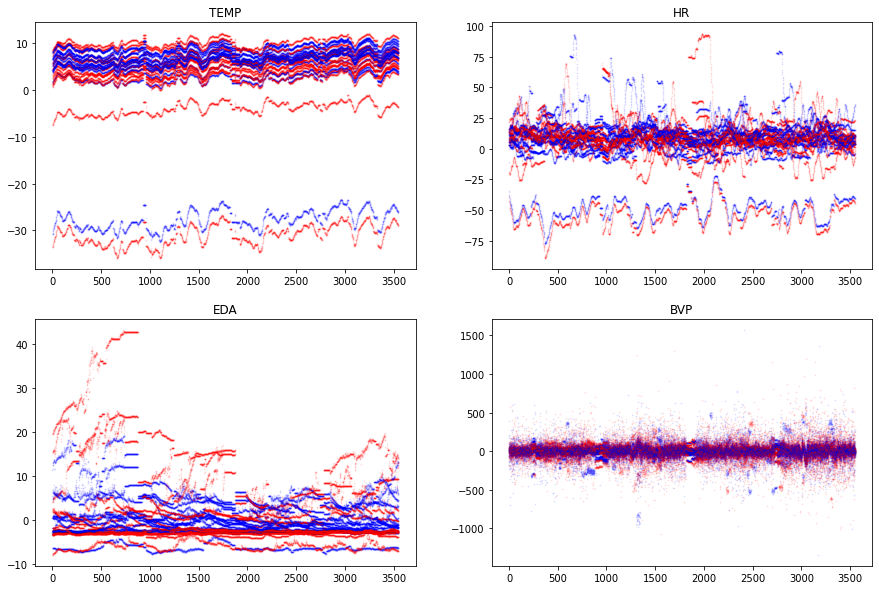

In [146]:
fig = plt.figure(figsize=(15,10))
k=0

for j in range(4):
    
    ax = fig.add_subplot(2,2,j+1)
    ax.set_title(bio_types[j])
    for p in range(26):
        if p in puzzler_ind:
            ax.scatter(range(n_timepoints), res[p,:,j], s=0.5, c=colors[0], alpha=0.1)
            k+=1
        else:
            ax.scatter(range(n_timepoints), res[p,:,j], s=0.5, c=colors[1],alpha=0.1)
            k+=1

     

In [147]:
puzzler_ind

[0, 3, 6, 7, 11, 12, 13, 14, 15, 18, 21, 23, 25]

In [148]:
# # for j in range(4):
# #     ax = fig.add_subplot(2,2,j+1)
# %matplotlib notebook
# fig, axs = plt.subplots(1, 1, subplot_kw={'projection': '3d'})

# k=0

# T = factors[2]

# for p in range(26):
#     res_f = res[p]@T

#     if p in puzzler_ind:
#         if p==0:
#             axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[0], label='puzzler')
#         else:
#             axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[0])        
#         k+=1
        
#     else:
#         if p==1:
#             axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[1], label='instructor')           
#         else:
#             axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[1])        
#         k+=1


# axs.set_xlabel('X')
# axs.set_ylabel('Y')
# axs.set_zlabel('Z')

# axs.legend()
        
        


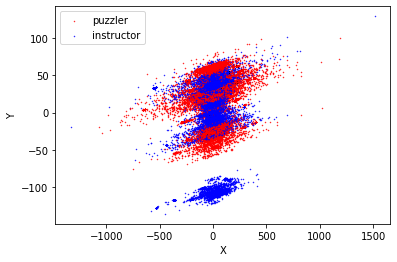

In [154]:
fig, axs = plt.subplots(1, 1)


res_bio = mode_dot(res2, factors2[2].T, mode=2)

for p in range(26):
    res_f = res_bio[p]

    if p in puzzler_ind:
        if p==0:
            axs.scatter(res_f[:,0], res_f[:,1], s=0.2, c=colors[0], label='puzzler')
        else:
            axs.scatter(res_f[:,0], res_f[:,1], s=0.2, c=colors[0])        
        k+=1
        
    else:
        if p==1:
            axs.scatter(res_f[:,0], res_f[:,1], s=0.2, c=colors[1], label='instructor')           
        else:
            axs.scatter(res_f[:,0], res_f[:,1], s=0.2, c=colors[1])        
        k+=1


axs.set_xlabel('X')
axs.set_ylabel('Y')


axs.legend()

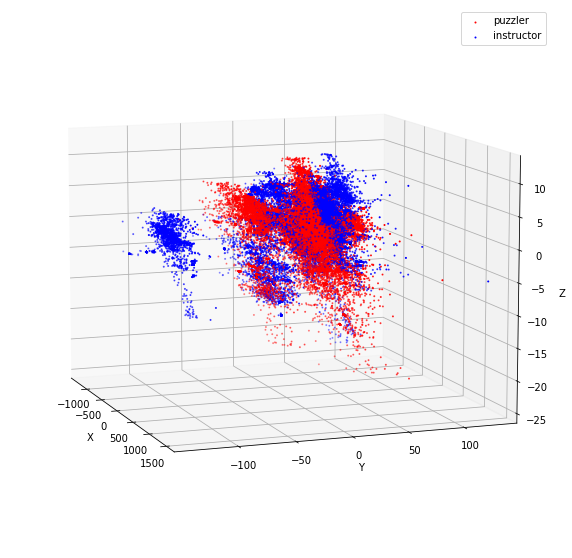

In [162]:
fig, axs = plt.subplots(1, 1, figsize=(10,10), subplot_kw={'projection': '3d'})

axs.view_init(elev=10, azim=-20)
for p in range(26):
    res_f = res_bio[p]

    if p in puzzler_ind:
        if p==0:
            axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[0], label='puzzler')
        else:
            axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[0])        
        k+=1
        
    else:
        if p==1:
            axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[1], label='instructor')           
        else:
            axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[1])        
        k+=1



axs.set_xlabel('X')
axs.set_ylabel('Y')
axs.set_zlabel('Z')

axs.legend()

### b. Do the 2 "people" components correspond to puzzler/instructor?

Not...likely, as the loadings do not show good clustering based on the role.

In [79]:
factors[0].shape

(26, 2)

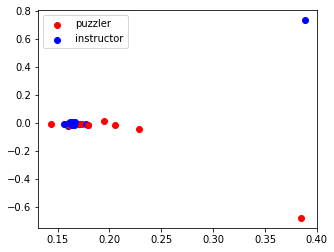

In [163]:
res_people = factors[0]
# mode_dot(res, factors[0].T, mode=0)

fig = plt.figure(figsize=(5,4))

for p in range(26):
    if p in puzzler_ind:
        color_code = 0
    else:
        color_code = 1
    
    plt.scatter(res_people[p][0],res_people[p][1], c=colors[color_code])

    
plt.scatter(res_people[0][0],res_people[0][1], c=colors[0], label='puzzler')
plt.scatter(res_people[1][0],res_people[1][1], c=colors[1], label='instructor')
plt.legend()
        
        

In [164]:
id_in_cohorts

{'D1_1': array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 'D1_2': array([1, 2, 3, 4, 5, 6], dtype=int64),
 'D1_3_1': array([1, 2, 3, 4], dtype=int64),
 'D1_3_2': array([1, 2, 3, 4], dtype=int64),
 'D1_3_3': array([1, 2], dtype=int64),
 'D1_3_4': array([1, 2], dtype=int64)}

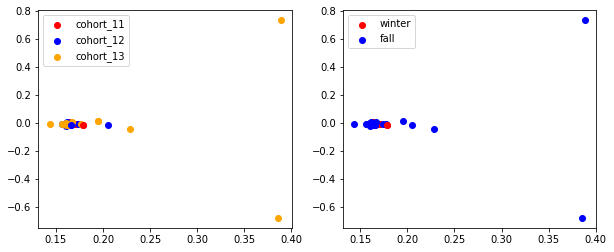

In [165]:
num_in_cohorts=[8,6,12]

fig, axs = plt.subplots(1,2, figsize=(10,4))

for p in range(26):
    
    if p in range(8):
        color_code_cohort = 0
        color_code_season = 0
        
    elif p in range(8,14):
        color_code_cohort = 1
        color_code_season = 1
        
    else: 
        color_code_cohort = 2
        color_code_season = 1
    
    axs[0].scatter(res_people[p][0],res_people[p][1], c=colors[color_code_cohort])
    axs[1].scatter(res_people[p][0],res_people[p][1], c=colors[color_code_season])

    
axs[0].scatter(res_people[0][0],res_people[0][1], c=colors[0], label='cohort_11')
axs[0].scatter(res_people[10][0],res_people[10][1], c=colors[1], label='cohort_12')
axs[0].scatter(res_people[-1][0],res_people[-1][1], c=colors[2], label='cohort_13')

axs[1].scatter(res_people[0][0],res_people[0][1], c=colors[0], label='winter')
axs[1].scatter(res_people[10][0],res_people[10][1], c=colors[1], label='fall')

axs[0].legend()
axs[1].legend()
        

In [166]:
df_emo

,emo1,emo2,emo3,emo4,cohort,ID,round,phase
0,-0.268750,-0.654402,0.739895,-0.702543,D1_1,1,1,1
1,-0.554672,-0.834168,-0.280056,0.703176,D1_1,1,1,2
2,-2.040119,-0.057368,-0.309506,0.374974,D1_1,1,1,3
3,-1.583581,0.020745,-0.515466,0.500707,D1_1,1,2,1
4,-0.174929,-0.919810,-0.122603,0.397034,D1_1,1,2,2
...,...,...,...,...,...,...,...,...
307,-1.431083,-0.868338,0.107588,0.184838,D1_3_4,2,3,2
308,-3.377370,-0.301790,0.322120,0.050460,D1_3_4,2,3,3
309,-1.431083,-0.868338,0.107588,0.184838,D1_3_4,2,4,1
310,-1.060531,-0.411149,0.774720,-0.794378,D1_3_4,2,4,2


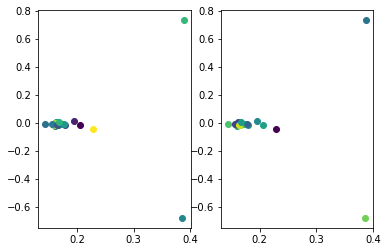

In [167]:
fig, axs = plt.subplots(1, 2)

df_emo_means = df_emo.groupby(['cohort', 'ID' ]).mean()
df_emo_means['emo1'] = (df_emo_means['emo1']-min(df_emo_means['emo1']))/(max(df_emo_means['emo1'])-min(df_emo_means['emo1']))
df_emo_means['emo2'] = (df_emo_means['emo2']-min(df_emo_means['emo2']))/(max(df_emo_means['emo2'])-min(df_emo_means['emo2']))

df_emo_means = df_emo_means.to_numpy()

for p in range(26):
    
    if p in range(8):
        color_code_cohort = 0
        
    elif p in range(8,14):
        color_code_cohort = 1
        
    else: 
        color_code_cohort = 2

    
    axs[0].scatter(res_people[p][0],res_people[p][1], c=plt.cm.viridis([df_emo_means[p][0]]))
    axs[1].scatter(res_people[p][0],res_people[p][1],  c=plt.cm.viridis([df_emo_means[p][1]]))

    
# axs[0].scatter(res_people[0][0],res_people[0][1], c=colors[0], label='cohort_11')
# axs[0].scatter(res_people[10][0],res_people[10][1], c=colors[1], label='cohort_12')
# axs[0].scatter(res_people[-1][0],res_people[-1][1], c=colors[2], label='cohort_13')


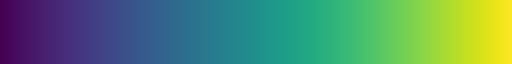

In [168]:
plt.cm.viridis

<AxesSubplot:xlabel='emo1', ylabel='emo2'>

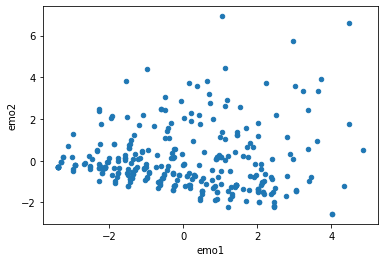

In [86]:
df_emo[['emo1','emo2']].plot(x='emo1', y='emo2', kind='scatter')

### c. Do the 3 time components correspond to three phases?

In [87]:
res_time = multi_mode_dot(res, [factors[1].T, factors[2].T], modes=[1,2])
res_time.shape

(26, 4, 3)

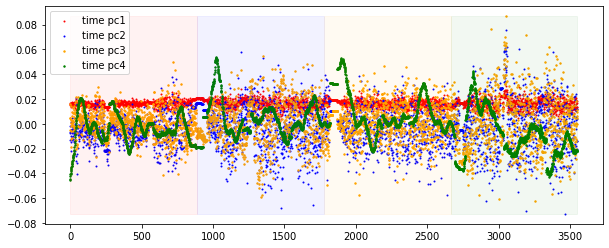

In [131]:
fig, axs = plt.subplots(1, 1, figsize = (10,4))

plt.scatter(range(n_timepoints), factors[1].T[0], c=colors[0], s=1, label='time pc1')
plt.scatter(range(n_timepoints), factors[1].T[1], c=colors[1], s=1, label='time pc2')
plt.scatter(range(n_timepoints), factors[1].T[2], c=colors[2], s=2, label='time pc3')
plt.scatter(range(n_timepoints), factors[1].T[3], c=colors[3], s=2, label='time pc4')


xs = np.linspace(0,3550,5)

# Area plot
for i,_ in enumerate(xs[:-1]):
    plt.fill_between(xs[i:i+2], y1=factors[1].max(), y2=factors[1].min(), alpha=0.05, color=colors[i%4])

plt.legend()

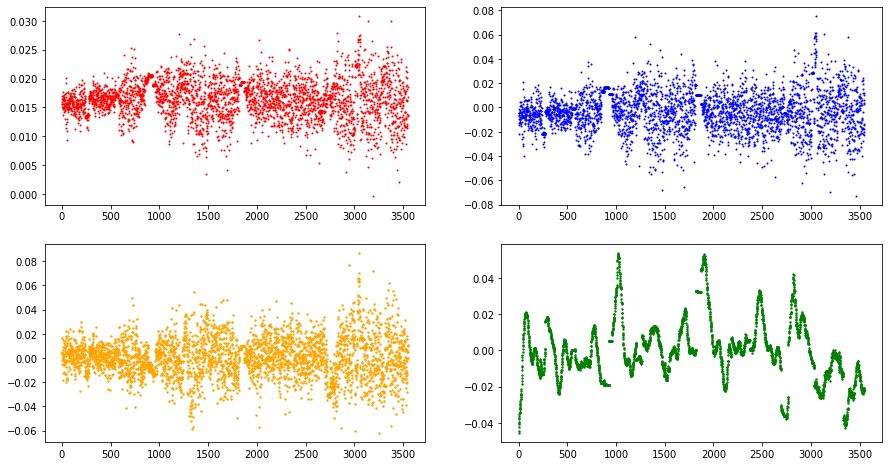

In [132]:
fig, axs = plt.subplots(2, 2, figsize = (15,8))

axs[0,0].scatter(range(n_timepoints), factors[1].T[0], c=colors[0], s=1, label='time pc1')
axs[0,1].scatter(range(n_timepoints), factors[1].T[1], c=colors[1], s=1, label='time pc2')
axs[1,0].scatter(range(n_timepoints), factors[1].T[2], c=colors[2], s=2, label='time pc3')
axs[1,1].scatter(range(n_timepoints), factors[1].T[3], c=colors[3], s=2, label='time pc4')


# xs = np.linspace(0,3550,5)

# # Area plot
# for i,_ in enumerate(xs[:-1]):
#     plt.fill_between(xs[i:i+2], y1=factors[1].max(), y2=factors[1].min(), alpha=0.05, color=colors[i%4])

# plt.legend()

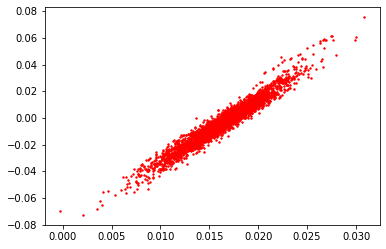

In [140]:
# %matplotlib notebook
fig, axs = plt.subplots(1, 1)
axs.scatter(factors[1].T[0], factors[1].T[1], c=colors[0], s=2)

In [ ]:
# fig, axs = plt.subplots(1, 1)

# plt.scatter(range(3550), factors[1].T[0], c=colors[0], s=2, label='time pc1')
# plt.scatter(range(3550), factors[1].T[1], c=colors[1], s=2, label='time pc2')
# plt.scatter(range(3550), factors[1].T[2], c=colors[2], s=2, label='time pc3')

# # plt.legend()

# # for i,df in enumerate(dfs_bios_by_person):
# #     rng = pd.date_range(df.time.min(), df.time.max(), periods=n_timepoints)
# #     print(df.time.max()-df.time.min())
    
    
    


In [ ]:
# fig, axs = plt.subplots(1, 1, subplot_kw={'projection': '3d'})

# for p in range(26):
#     res_f = res_time[p]
    
#     axs.scatter(res_f[0,0], res_f[0,1], res_f[0,2], s=2, c=colors[0])
#     axs.scatter(res_f[1,0], res_f[1,1], res_f[1,2], s=2, c=colors[1])
#     axs.scatter(res_f[2,0], res_f[2,1], res_f[2,2], s=2, c=colors[2])
    
# axs.scatter(res_f[0,0], res_f[0,1], res_f[0,2], s=2, c=colors[0], label = 'time1')
# axs.scatter(res_f[1,0], res_f[1,1], res_f[1,2], s=2, c=colors[1], label = 'time2')
# axs.scatter(res_f[2,0], res_f[2,1], res_f[2,2], s=2, c=colors[2], label = 'time3')
    
# #     if p in puzzler_ind:
# #         if p==0:
# #             axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[0], label='puzzler')
# #         else:
# #             axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[0])        
# #         k+=1
        
# #     else:
# #         if p==1:
# #             axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[1], label='instructor')           
# #         else:
# #             axs.scatter(res_f[:,0], res_f[:,1], res_f[:,2], s=1, c=colors[1])        
# #         k+=1


# axs.set_xlabel('X')
# axs.set_ylabel('Y')
# axs.set_zlabel('Z')

# axs.legend()